# Example normality test

We hypothesize that the human body temp data is not normal because we don't see enough extreme values. To test this, we compare the range (max - min) of our data to the range of a normal distribution with the parameters we have fitted in our exercises (using the sample mean and stddev)

Findings: our data are actually *more* spread out than the normal distribution would predict, negating our hypothesis. Also, the test statistic is only at the 94th percentile, meaning we also could not reject a null hypothesis that our data is so much more spread out that it's not normal.

In [1]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

import datetime as dt
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

####################################################
# END Boilerplate
####################################################

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Our test statistic will be the "range" of the data, the distance from its max to min value

In [3]:
body_temp_range = max(df.temperature) - min(df.temperature)

### Code to simulate what kind of ranges we would get if the data was *actually* normal (with the parameters we infer from the sample)

In [4]:
MU = df.temperature.mean()  # 98.25
SIGMA = df.temperature.std()  # 0.733
N = len(df.temperature)  # 130
num_draws = 10000

print("Simulating %d draws of %d samples from N(%.3f, %.3f)" % (num_draws, N, MU, SIGMA))

ranges = []
for i in range(1000):
    s = [np.random.normal(MU, SIGMA) for i in range(N)]
    ranges.append(max(s) - min(s))

Simulating 10000 draws of 130 samples from N(98.249, 0.733)


### We hypothesized that the range of our body temp data is *smaller* than a normal distribution would predict, so our p value is the fraction of normal samples that have a smaller range

In [5]:
frac_below = sum(1 for r in ranges if r < body_temp_range) / float(len(ranges))

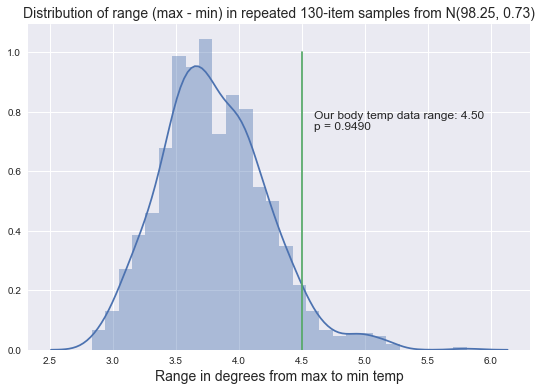

In [6]:
fig, ax = plt.subplots(1)
fig.set_size_inches(9, 6)
sns.distplot(ranges, ax=ax)
ax.plot([body_temp_range, body_temp_range], [0, 1])
ax.set_title("Distribution of range (max - min) in repeated "
             "%d-item samples from N(%.2f, %.2f)" % (
                 N, MU, SIGMA), size=14)
ax.set_xlabel("Range in degrees from max to min temp", size=14)
ax.text(4.6, .7,
        'Our body temp data range: %.2f\n'
        'p = %.4f \n' % (
            body_temp_range, frac_below), size=12)
pass